In [1]:
%matplotlib inline

In [2]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import json

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date

In [4]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
#Visit the Mars NASA temprature site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

In [6]:
html = browser.html
temp_soup = soup(html, 'html.parser')

In [7]:
temp_table=temp_soup.find('table',class_="table")

In [8]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [9]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [11]:
mars_df.astype({'terrestrial_date': 'datetime64[ns]'})

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [13]:
# How many months exist on Mars?
martian_months = mars_df['month'].nunique()
print(f"{martian_months} months exists on Mars.")

12 months exists on Mars.


In [14]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
martian_days=mars_df['sol'].count()
print(f"{martian_days} days worth of data is available in scrapped dataset")

1867 days worth of data is available in scrapped dataset


In [15]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Get the answer by averaging the minimum daily temperature of all the months
new_df=mars_df.groupby('month')
temp_df=new_df.mean().loc[:,['min_temp']]
temp_df.rename(columns={'min_temp': 'Avg_Min_Temp'}, inplace=True)
temp_df

,Avg_Min_Temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


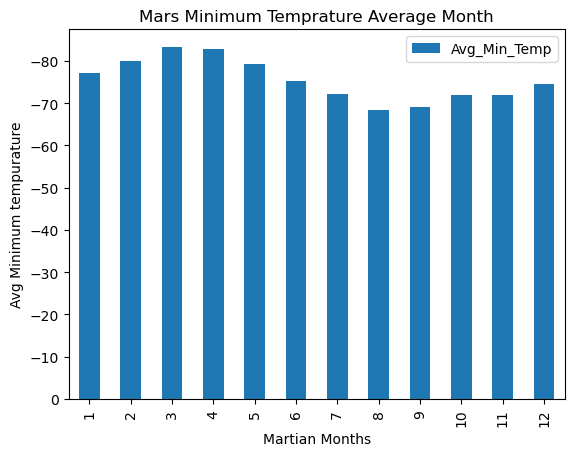

In [16]:
# Plot the results as a bar chart.

ax = temp_df.plot.bar()
ax.invert_yaxis()
plt.xlabel("Martian Months")
plt.ylabel("Avg Minimum tempurature")
plt.title("Mars Minimum Temprature Average Month")
plt.show()


In [17]:
# The warmest month 
warmest_month = temp_df.loc[temp_df['Avg_Min_Temp']==temp_df['Avg_Min_Temp'].max()]
warmest_month

,Avg_Min_Temp
month,
8,-68.382979


In [18]:
# The coldest month 
coldest_month = temp_df.loc[temp_df['Avg_Min_Temp']==temp_df['Avg_Min_Temp'].min()]
coldest_month

,Avg_Min_Temp
month,
3,-83.307292


In [19]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
# Grouping DataFrame by the average of pressure for each month
new_df=mars_df.groupby('month')
pressure_df=new_df.mean().loc[:,['pressure']]
pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [20]:
# The month with the lowest atmospheric pressure  
min_pressure=pressure_df.loc[pressure_df['pressure']==pressure_df['pressure'].min()]
min_pressure

,pressure
month,
6,745.054422


In [21]:
# The month with the highest atmospheric pressure  
max_pressure=pressure_df.loc[pressure_df['pressure']==pressure_df['pressure'].max()]
max_pressure

,pressure
month,
9,913.30597


Text(0.5, 1.0, 'Average Atmosphere Pressure')

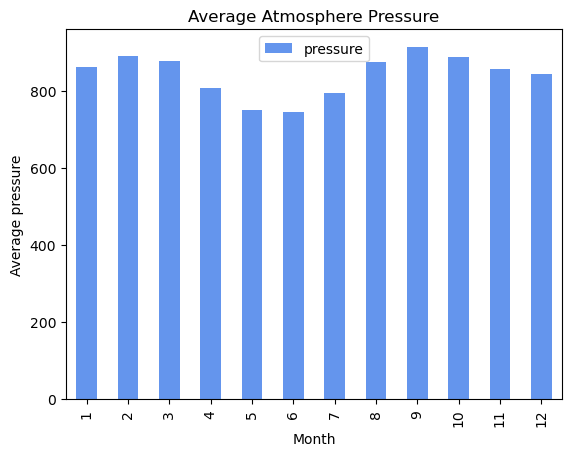

In [22]:
# Plot the results as a bar chart
pressure_df.plot.bar(color="cornflowerblue")
plt.xlabel("Month")
plt.ylabel("Average pressure")
plt.title('Average Atmosphere Pressure')

In [23]:
start=mars_df['ls'].loc[0]
year_df=mars_df.loc[mars_df['ls']==start]
year_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [24]:
year_df=year_df.astype({'terrestrial_date': 'datetime64[ns]'})

In [25]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth?

d1=year_df['terrestrial_date'].iloc[1]
d2=year_df['terrestrial_date'].iloc[0]
martian_year = year_df['terrestrial_date'].iloc[1]-year_df['terrestrial_date'].iloc[0]
print(f'There are',martian_year,'in one Martian year')

There are 686 days 00:00:00 in one Martian year


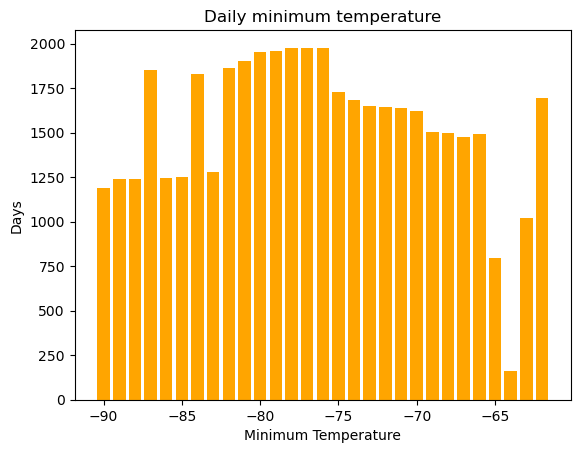

In [26]:
#  Visually estimate the result by plotting the daily minimum temperature
plt.bar(mars_df['min_temp'],mars_df['sol'], color = "orange")
plt.ylabel("Days")
plt.xlabel("Minimum Temperature")
plt.title('Daily minimum temperature')
plt.show()

In [27]:
# Export the DataFrame to a CSV file
mars_df.to_csv('mars_table.csv',index=False)